In [1]:
import numpy as np
import ChebTools as ct
import matplotlib.pyplot as plt
import scipy.interpolate as interpolate
%matplotlib inline

In [2]:
import matplotlib as mpl
#mpl.rc('lines', linewidth=2, color='r')
plt.style.available

['seaborn-dark',
 'grayscale',
 'seaborn-colorblind',
 'fivethirtyeight',
 'dark_background',
 'seaborn-deep',
 'seaborn-muted',
 'classic',
 'bmh',
 'ggplot',
 'seaborn-bright',
 'seaborn-talk',
 'seaborn-white',
 'seaborn-whitegrid',
 'seaborn-dark-palette',
 'seaborn-poster',
 'seaborn-paper',
 'seaborn-ticks',
 'seaborn-darkgrid',
 'seaborn-pastel',
 'seaborn-notebook']

In [3]:
plt.style.use('seaborn-poster')
mpl.rcParams['text.usetex'] = True
mpl.rcParams['text.latex.preamble'] = [
       r'\usepackage{siunitx}',   # i need upright \micro symbols, but you need...
       r'\sisetup{detect-all}',   # ...this to force siunitx to actually use your fonts
       r'\usepackage{helvet}',    # set the normal font here
       r'\usepackage{sansmath}',  # load up the sansmath so that math -> helvet
       r'\sansmath'               # <- tricky! -- gotta actually tell tex to use!
] 
#mpl.rcParams['axes.titlepad'] = 15

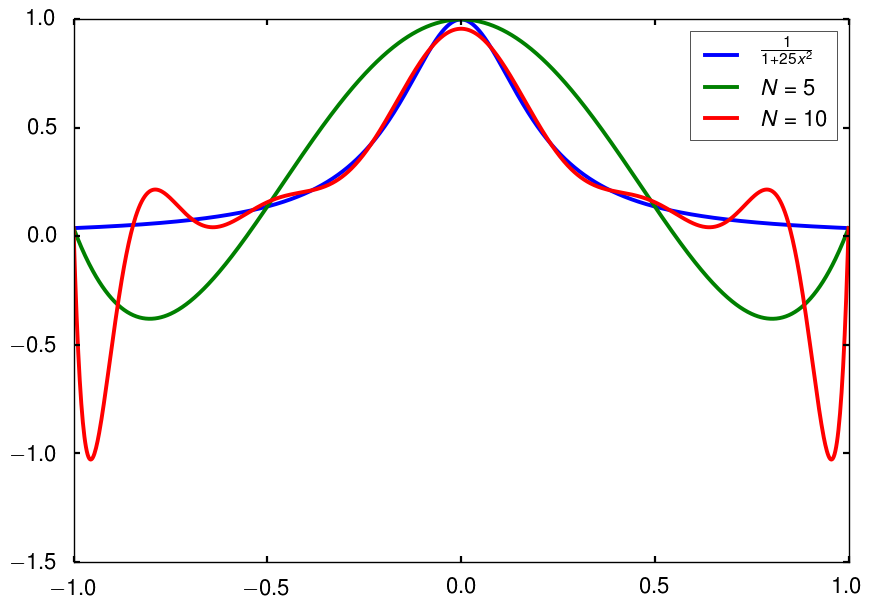

In [4]:
def f(x):
    return 1/(1+25*x**2)


xvals = np.linspace(-1,1,1000)

poly5 = interpolate.lagrange(np.linspace(-1,1,5),f(np.linspace(-1,1,5)))
poly10 = interpolate.lagrange(np.linspace(-1,1,14),f(np.linspace(-1,1,14)))
#poly15 = interpolate.lagrange(np.linspace(-1,1,15),f(np.linspace(-1,1,15)))
plt.figure(figsize=(10,7))
plt.plot(xvals,f(xvals), label=r"$\frac{1}{1+25x^2}$")
plt.plot(xvals,poly5(xvals),label=r"$N = 5$")
plt.plot(xvals,poly10(xvals),label=r"$N = 10$")
#plt.plot(xvals,poly15(xvals),label=r"$N = 15$")
plt.legend()

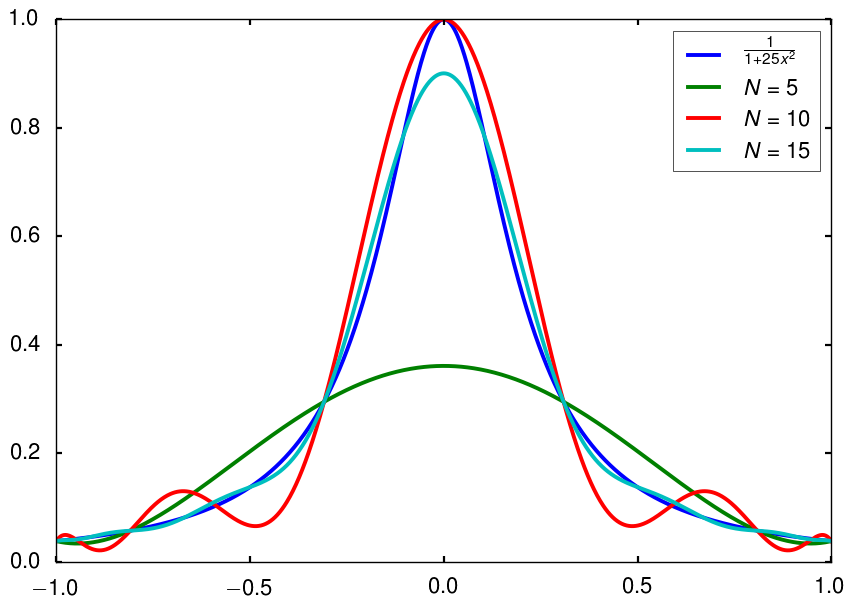

In [5]:
def f(x):
    return 1/(1+25*x**2)


xvals = np.linspace(-1,1,1000)



cheb5 = ct.generate_Chebyshev_expansion(5,f,-1,1)
cheb10 = ct.generate_Chebyshev_expansion(10,f,-1,1)
cheb15 = ct.generate_Chebyshev_expansion(15,f,-1,1)
plt.figure(figsize=(10,7))
plt.plot(xvals,f(xvals), label=r"$\frac{1}{1+25x^2}$")
plt.plot(xvals,cheb5.y(xvals),label=r"$N = 5$")
plt.plot(xvals,cheb10.y(xvals),label=r"$N = 10$")
plt.plot(xvals,cheb15.y(xvals),label=r"$N = 15$")
plt.legend()

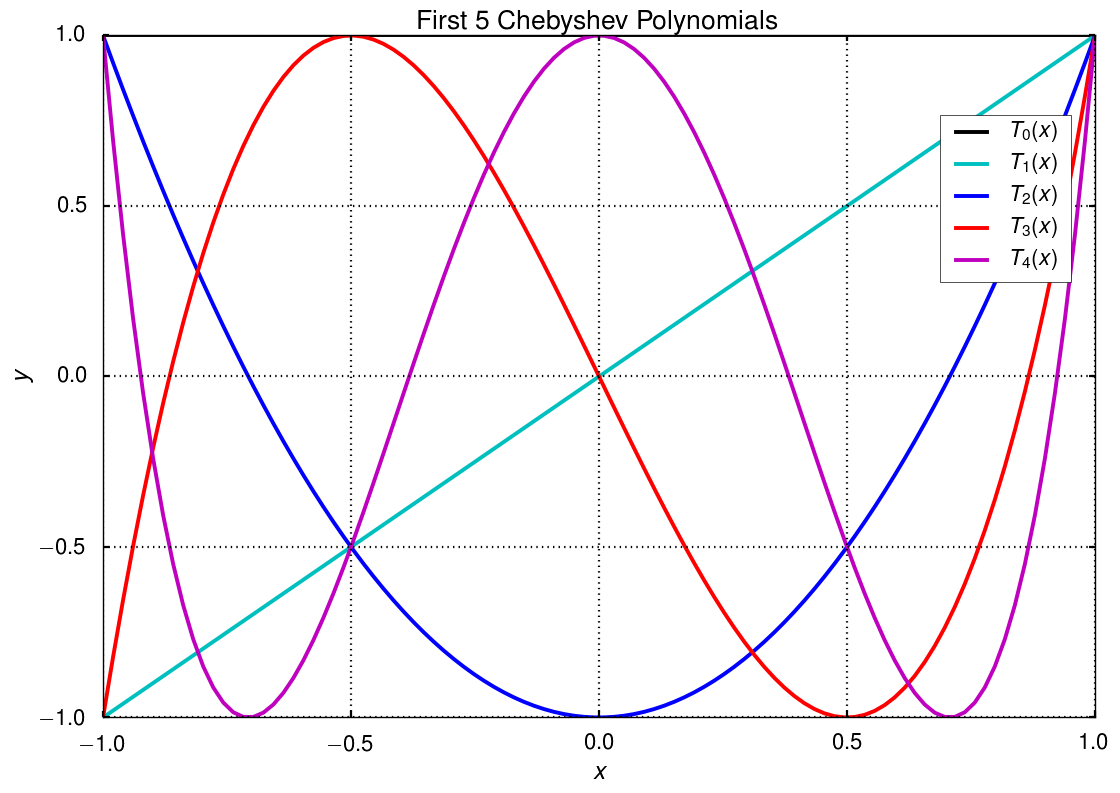

In [6]:

left=-1
right=1
xvals = np.linspace(left,right,100)

c0 = 'k'
c1 = 'c'
c2 = 'b'
c3 = 'r'
c4 = 'm'

fig, axarr = plt.subplots(1)
axarr.plot(xvals,np.ones(len(xvals)),c0,label=r"$T_0(x)$")
axarr.plot(xvals,xvals,c1,label=r"$T_1(x)$")
axarr.plot(xvals,2*xvals**2-1,c2,label=r"$T_2(x)$")
axarr.plot(xvals,4*xvals**3-3*xvals,c3,label=r"$T_3(x)$")
axarr.plot(xvals,8*xvals**4-8*xvals**2+1,c4,label=r"$T_4(x)$")
axarr.legend(bbox_to_anchor=(.987, .9))
axarr.grid()
axarr.set_xlabel(r"$x$")
axarr.set_ylabel(r"$y$")
axarr.set_title(r"First 5 Chebyshev Polynomials")
axarr.set_xlim([left,right])
fig.savefig("cheb_poly_plot.pdf")

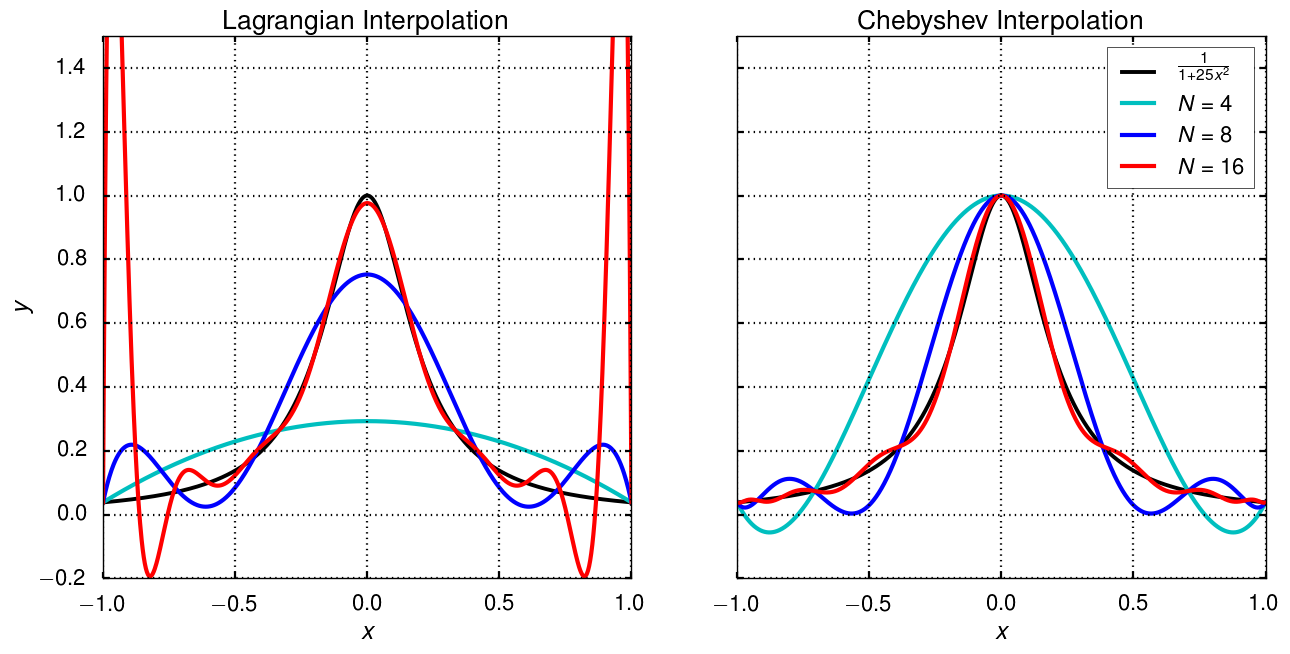

In [7]:
def f(x):
    return 1/(1+25*x**2)


xvals = np.linspace(-1,1,1000)

poly4 = interpolate.lagrange(np.linspace(-1,1,4),f(np.linspace(-1,1,4)))
poly8 = interpolate.lagrange(np.linspace(-1,1,8),f(np.linspace(-1,1,8)))
poly16 = interpolate.lagrange(np.linspace(-1,1,16),f(np.linspace(-1,1,16)))
cheb4 = ct.generate_Chebyshev_expansion(4,f,-1,1)
cheb8 = ct.generate_Chebyshev_expansion(8,f,-1,1)
cheb16 = ct.generate_Chebyshev_expansion(16,f,-1,1)


lw = 3
c0 = 'k'
c1 = 'c'
c2 = 'b'
c3 = 'r'

fig, axarr = plt.subplots(1,2,sharey=True,figsize=(15,7))
axarr[0].set_title(r'Lagrangian Interpolation')
axarr[0].grid()
axarr[0].plot(xvals,f(xvals),c0, label=r"$\frac{1}{1+25x^2}$")
axarr[0].plot(xvals,poly4(xvals),c1,linewidth=lw,label=r"$N = 4$")
axarr[0].plot(xvals,poly8(xvals),c2,linewidth=lw,label=r"$N = 8$")
axarr[0].plot(xvals,poly16(xvals),c3,linewidth=lw,label=r"$N = 16$")
axarr[0].set_ylim([-.2,1.5])
axarr[0].set_xlim([-1,1])
axarr[0].set_ylabel(r"$y$")
axarr[0].set_xlabel(r"$x$")
axarr[1].set_title(r"Chebyshev Interpolation")
axarr[1].grid()
axarr[1].plot(xvals,f(xvals),c0, label=r"$\frac{1}{1+25x^2}$")
axarr[1].plot(xvals,cheb4.y(xvals),c1,linewidth=lw,label=r"$N = 4$")
axarr[1].plot(xvals,cheb8.y(xvals),c2,linewidth=lw,label=r"$N = 8$")
axarr[1].plot(xvals,cheb16.y(xvals),c3,linewidth=lw,label=r"$N = 16$")
axarr[1].set_xlabel(r"$x$")
axarr[1].legend()
axarr[1].set_xlim([-1,1])
fig.savefig("runge_plot.pdf")

In [8]:
def f(x):
    if x<=0:
        return 0*x
    else:
        return x**3
def vec_f(xs):
    ans = np.zeros(len(xs))
    for i, x in enumerate(xs):
        ans[i] = f(x)
    return ans


N = 100
error_array2 = np.zeros(N)

xvals1 = np.linspace(-1,1,100)
for i in range(1,N+1):
    error_array2[i-1] = np.max(np.abs(vec_f(xvals1)-ct.generate_Chebyshev_expansion(i,f,-1,1).y(xvals1)))

In [9]:
def f(x):
    return np.exp(x)

xvals = np.linspace(-1,1,1000)
error_arrayinf = np.zeros(N)
for i in range(1,N+1):
    error_arrayinf[i-1] = np.max(np.abs(f(xvals)-ct.generate_Chebyshev_expansion(i,f,-1,1).y(xvals)))

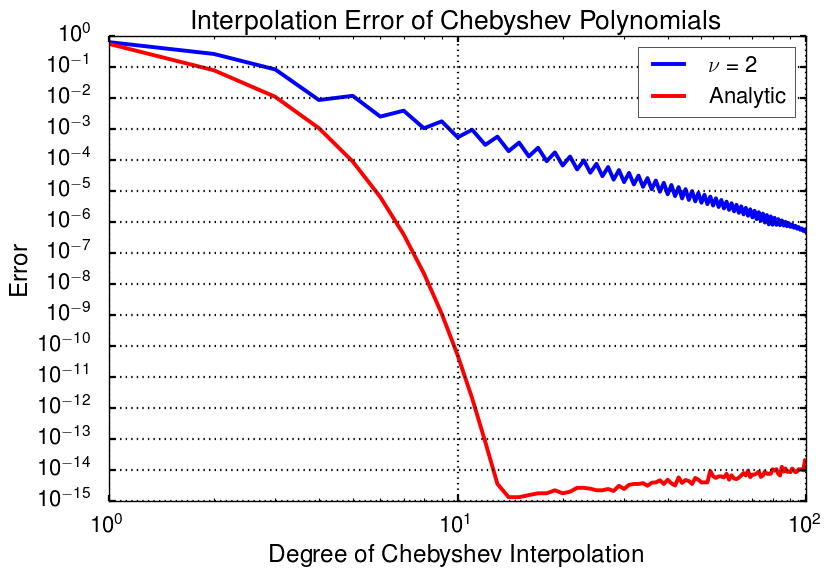

In [10]:
plt.figure(figsize=(9,6))
plt.loglog(np.arange(1,N+1),error_array2,c2,label=r"$\nu = 2$")
plt.loglog(np.arange(1,N+1),error_arrayinf,c3,label=r"Analytic")
plt.xlabel(r"Degree of Chebyshev Interpolation")
plt.ylabel(r"Error")
plt.title(r"Interpolation Error of Chebyshev Polynomials")
plt.grid()
plt.legend()
plt.savefig("cheb_convergence_plots.pdf")

In [11]:
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm

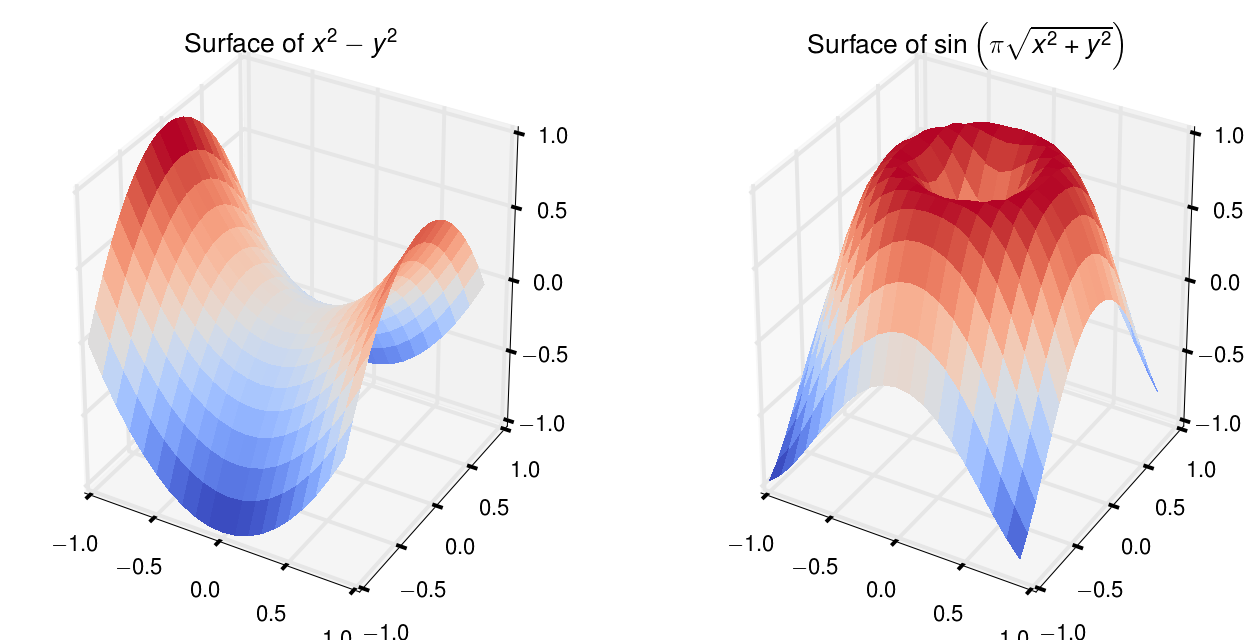

In [12]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

#===============
#  First subplot
#===============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface like in the example mplot3d/surface3d_demo
X = np.arange(-1, 1, 0.1)
Y = np.arange(-1, 1, 0.1)
X, Y = np.meshgrid(X, Y)
Z1 = X**2-Y**2
ax.set_title(r"Surface of $x^2-y^2$")
ax.plot_surface(X, Y, Z1, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

#===============
# Second subplot
#===============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')
Z2 = np.sin(np.pi*np.sqrt(X**2+Y**2))
# plot a 3D wireframe like in the example mplot3d/wire3d_demo
ax.set_title(r"Surface of $\sin\left(\pi\sqrt{x^2+y^2}\right)$")
ax.plot_surface(X, Y, Z2, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


fig.savefig("surface_plots1.pdf")

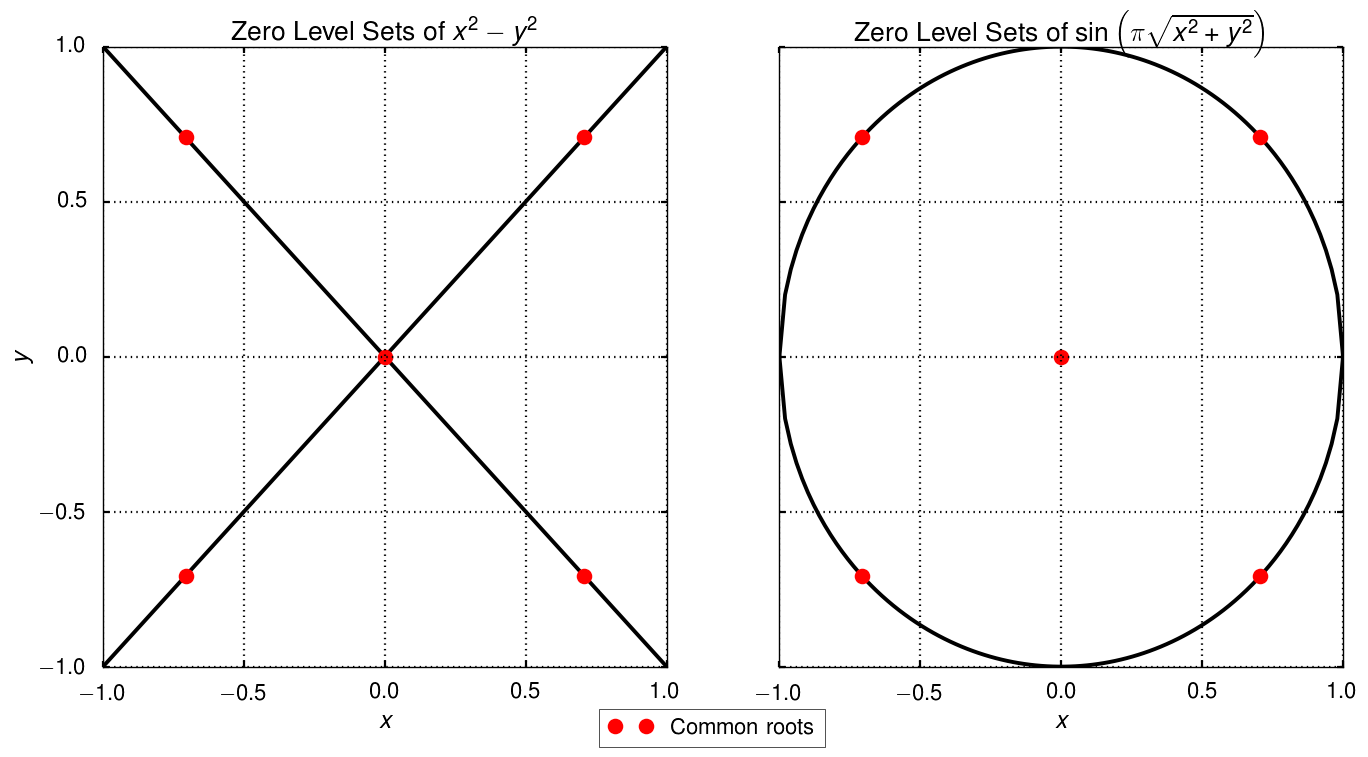

In [13]:


xroots =[0,np.sqrt(2)/2,np.sqrt(2)/2,-np.sqrt(2)/2,-np.sqrt(2)/2]
yroots =[0,np.sqrt(2)/2,-np.sqrt(2)/2,np.sqrt(2)/2,-np.sqrt(2)/2]

fig, axarr = plt.subplots(1,2,sharey=True,figsize=plt.figaspect(0.5))
x1 = np.linspace(-1,1,100)
y1 = x1
axarr[0].plot(x1,y1,'k')
x2=-x1
axarr[0].plot(x2,y1,'k')
axarr[0].plot(xroots,yroots,'or')
axarr[0].set_title(r"Zero Level Sets of $x^2-y^2$")
axarr[0].set_xlabel(r"$x$")
axarr[0].set_ylabel(r"$y$")
axarr[0].grid()
axarr[0].set_ylabel(r"$y$")
axarr[0].set_xlabel(r"$x$")
axarr[0].set_xlim([-1,1])
axarr[0].set_ylim([-1,1])



x1 = np.linspace(-1,1,100)
y1 = np.sqrt(1-x1**2)
axarr[1].plot(x1,y1,'k')
y2 = -y1
axarr[1].plot(x1,y2,'k')
axarr[1].plot([0],[0],'.k')
axarr[1].plot(xroots,yroots,'or',label="Common roots")
axarr[1].set_title(r"Zero Level Sets of $\sin\left(\pi\sqrt{x^2+y^2}\right)$")
axarr[1].set_xlabel(r"$x$")
axarr[1].grid()
axarr[1].legend(bbox_to_anchor=(.1, -0.05))
axarr[1].set_xlim([-1,1])

fig.savefig("level_sets1.pdf")

In [14]:
from numpy.linalg import LinAlgError
def newton(f,g,dfdx,dfdy,dgdx,dgdy,x0):
    tol = 1e-14
    err = 1
    x = x0
    z = np.zeros(2)
    jacobian = np.zeros((2,2))
    count = 0
    while err>tol:
        if count>10:
            break
        value = np.array([f(x),g(x)])
        jacobian = np.array([[dfdx(x),dfdy(x)],[dgdx(x),dgdy(x)]])
        try:
            z = np.linalg.solve(jacobian,value)
        except LinAlgError:
            if np.max(np.abs(value))<tol:
                return x
        x = x - z
        err = np.max(np.abs(z))
        count += 1
    return x
def f(x):
    return x[0]**2-x[1]**2
def dfdx(x):
    return x[0]*2
def dfdy(x):
    return -2*x[1]
def g(x):
    return np.sin(np.pi*np.sqrt(x[0]**2+x[1]**2))
def dgdx(x):
    return np.pi*x[0]*np.cos(np.pi*np.sqrt(x[0]**2+x[1]**2))/np.sqrt(x[0]**2+x[1]**2)
def dgdy(x):
    return np.pi*x[1]*np.cos(np.pi*np.sqrt(x[0]**2+x[1]**2))/np.sqrt(x[0]**2+x[1]**2)
.001
print(newton(f,g,dfdx,dfdy,dgdx,dgdy,np.array([0.001,.1])))

[-5895.12113712  5895.12113712]


In [15]:
X = np.linspace(-1, 1, 201)
Y = np.linspace(-1, 1,201)
list1 = []
root1 = np.array([np.sqrt(2)/2,np.sqrt(2)/2])
list2 = []
root2 = np.array([-np.sqrt(2)/2,np.sqrt(2)/2])
list3 = []
root3 = np.array([-np.sqrt(2)/2,-np.sqrt(2)/2])
list4 = []
root4 = np.array([np.sqrt(2)/2,-np.sqrt(2)/2])
list0 = []
root0 = np.array([0,0])
list5 = []
tol = 1e-10
for x in X:
    for y in Y:
        x0 = np.array([x,y])
        root = newton(f,g,dfdx,dfdy,dgdx,dgdy,x0)
        if np.linalg.norm(root-root0)<tol:
            list0.append(x0)
        elif np.linalg.norm(root-root1)<tol:
            list1.append(x0)
        elif np.linalg.norm(root-root2)<tol:
            list2.append(x0) 
        elif np.linalg.norm(root-root3)<tol:
            list3.append(x0)
        elif np.linalg.norm(root-root4)<tol:
            list4.append(x0)
        else:
            list5.append(x0)
arr0 = np.vstack(list0)
arr1 = np.vstack(list1)
arr2 = np.vstack(list2)
arr3 = np.vstack(list3)
arr4 = np.vstack(list4)
arr5 = np.vstack(list5)

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in double_scalars
//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in double_scalars


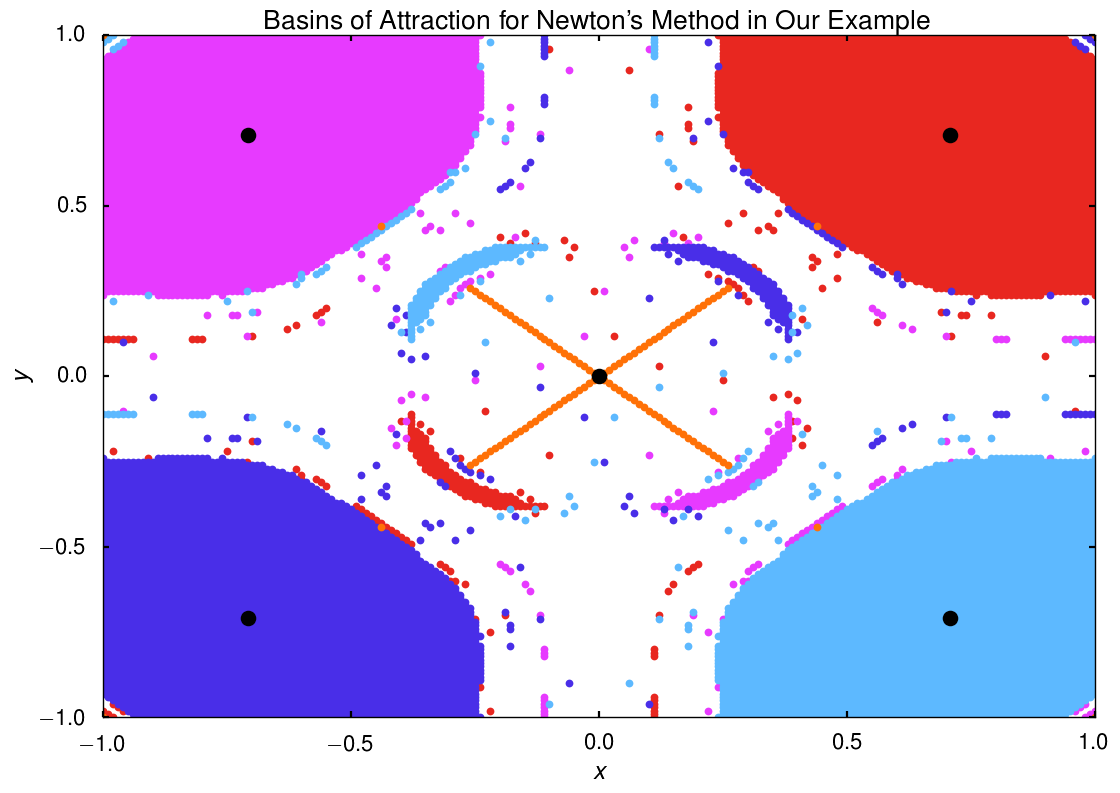

In [ ]:
fig = plt.figure()
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"Basins of Attraction for Newton's Method in Our Example")

plt.plot(arr1[:,0],arr1[:,1],'.',color='#E82720')
plt.plot(arr2[:,0],arr2[:,1],'.',color='#E73AFF')
plt.plot(arr3[:,0],arr3[:,1],'.',color='#492EE8')
plt.plot(arr4[:,0],arr4[:,1],'.',color='#5DB9FF')
plt.plot(arr0[:,0],arr0[:,1],'.',color='#FF7107')
#plt.legend(bbox_to_anchor=(1, 1))
plt.plot(xroots,yroots,'ok')
plt.savefig("newton_basins.pdf")

In [ ]:
X = np.linspace(-1, 1, 501)
Y = np.linspace(-1, 1,501)
list1 = []
root1 = np.array([np.sqrt(2)/2,np.sqrt(2)/2])
list2 = []
root2 = np.array([-np.sqrt(2)/2,np.sqrt(2)/2])
list3 = []
root3 = np.array([-np.sqrt(2)/2,-np.sqrt(2)/2])
list4 = []
root4 = np.array([np.sqrt(2)/2,-np.sqrt(2)/2])
list0 = []
root0 = np.array([0,0])
list5 = []
tol = 1e-10
for x in X:
    for y in Y:
        x0 = np.array([x,y])
        root = newton(f,g,dfdx,dfdy,dgdx,dgdy,x0)
        if np.linalg.norm(root-root0)<tol:
            list0.append(x0)
        elif np.linalg.norm(root-root1)<tol:
            list1.append(x0)
        elif np.linalg.norm(root-root2)<tol:
            list2.append(x0) 
        elif np.linalg.norm(root-root3)<tol:
            list3.append(x0)
        elif np.linalg.norm(root-root4)<tol:
            list4.append(x0)
        else:
            list5.append(x0)
arr0 = np.vstack(list0)
arr1 = np.vstack(list1)
arr2 = np.vstack(list2)
arr3 = np.vstack(list3)
arr4 = np.vstack(list4)
arr5 = np.vstack(list5)
fig = plt.figure()
plt.xlim([-1,1])
plt.ylim([-1,1])
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.title(r"Basins of Attraction for Newton's Method in Our Example")

plt.plot(arr1[:,0],arr1[:,1],'.',color='#E82720')
plt.plot(arr2[:,0],arr2[:,1],'.',color='#E73AFF')
plt.plot(arr3[:,0],arr3[:,1],'.',color='#492EE8')
plt.plot(arr4[:,0],arr4[:,1],'.',color='#5DB9FF')
plt.plot(arr0[:,0],arr0[:,1],'.',color='#FF7107')
#plt.legend(bbox_to_anchor=(1, 1))
plt.plot(xroots,yroots,'ok')
plt.savefig("newton_basins2.pdf")

//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:32: RuntimeWarning: invalid value encountered in double_scalars
//anaconda/lib/python3.4/site-packages/ipykernel/__main__.py:34: RuntimeWarning: invalid value encountered in double_scalars
